# Exploring node2vec

In [1]:
import logging

%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA, KernelPCA
import jwalk
from gensim.models import Word2Vec

from nw2vec import utils

logging.basicConfig(level=logging.DEBUG)

This is the Karate club network:

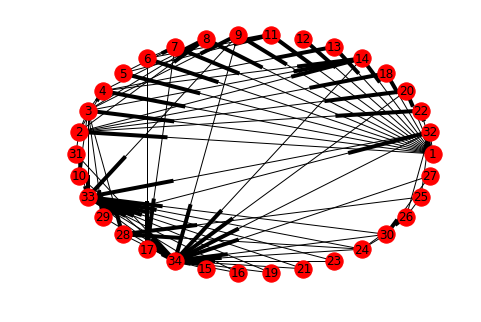

In [2]:
karate = nx.read_edgelist('data/karate/karate.edgelist', delimiter=',',
                          nodetype=int, create_using=nx.DiGraph())
nx.draw_circular(karate, with_labels=True)

Compute Karate-club embeddings

In [3]:
karate_embfile = utils.node2vec('data/karate/karate.edgelist', 'data/karate/karate.emb')

INFO:nw2vec.utils:Loading edges from data/karate/karate.edgelist
DEBUG:nw2vec.utils:Loaded edges of shape (78, 2)
INFO:nw2vec.utils:Building adjacency matrix
INFO:jwalk.graph:Weight column not found. Defaulting to value 1.
DEBUG:nw2vec.utils:Number of unique nodes: 34
INFO:nw2vec.utils:Saving graph to data/karate/karate.edgelist.npz
INFO:nw2vec.utils:Doing 10 random walks of length 80
DEBUG:nw2vec.utils:Walks shape: (340, 80)
INFO:nw2vec.utils:Building corpus from walks
INFO:nw2vec.utils:Running Word2Vec on corpus
DEBUG:gensim.models.word2vec:Fast version of gensim.models.word2vec is being used
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:min_count=1 retains 34 unique words (100% of original 34, drops 0)
INFO:gensim.models.word2vec:min_count=1 leaves 732 word corpus (100% of original 732, drops 0)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 34 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 34 most-common words
INFO

Get computed Karate-club embeddings into a DataFrame

In [4]:
karate_emb = Word2Vec.load(karate_embfile)
karate_emb = pd.DataFrame(dict((int(w), karate_emb.wv[w]) for w in karate_emb.wv.vocab)).transpose()

INFO:gensim.utils:loading Word2Vec object from data/karate/karate.emb
INFO:gensim.utils:loading wv recursively from data/karate/karate.emb.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded data/karate/karate.emb


Have a look at their PCA

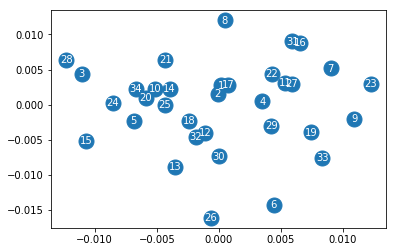

In [5]:
# Reduce dimensions
pca = KernelPCA(n_components=2)
karate_emb2d = pca.fit_transform(karate_emb)
karate_emb2d = pd.DataFrame(karate_emb2d, index=karate_emb.index)

# Plot
fig, ax = plt.subplots()
ax.plot(karate_emb2d[0], karate_emb2d[1], 'o', markersize=15)
for label, (x, y) in karate_emb2d.iterrows():
    ax.text(x, y, label, ha='center', va='center', color='white')

Compared to a spring layout of the graph. Not sure what to think about this.

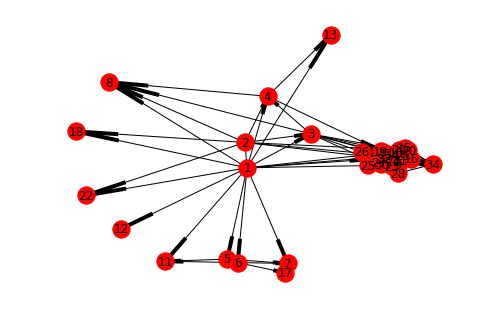

In [6]:
nx.draw_spring(karate, with_labels=True)